In [1]:
import pandas_datareader.data as web
import datetime as dt                         
import matplotlib.pyplot as plt              #to be able to visualize data
from matplotlib import style                 #to bring more style in graph
import pandas as pd
import numpy as np
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import bs4 as bs
import pickle
import requests
import os

/home/harsh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
style.use('ggplot')

In [6]:
start=dt.datetime(2010,1,1)
end=dt.datetime(2016,12,31)

In [17]:
df=web.DataReader('TSLA','yahoo',start,end)

In [18]:
df.to_csv('tsla.csv')

In [22]:
df=pd.read_csv('JPM_test_OP.csv',index_col=0)

In [28]:
df.reset_index(inplace=True)

In [29]:
df.head()

,Date,Adj Close,MACD,Volume,100ma
0,2017-01-03,84.842056,0,20550700,NaN
1,2017-01-04,84.998543,0,15266600,NaN
2,2017-01-05,84.216133,0,14300800,NaN
3,2017-01-06,84.225914,0,12893300,NaN
4,2017-01-09,84.284584,0,12735600,NaN


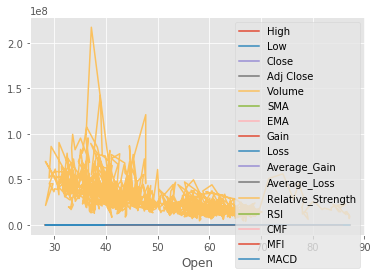

In [4]:
df.plot()


TypeError: Empty 'DataFrame': no numeric data to plot

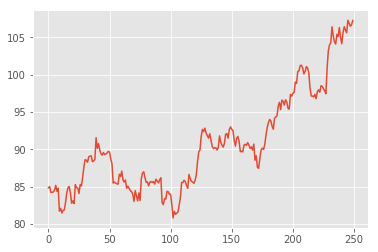

In [31]:
df['Adj Close'].plot()
df["Date"].plot()

In [25]:
df['100ma']=df['Adj Close'].rolling(window=100).mean()


Size of the moving window. This is the number of observations used for calculating the statistic. Each window will be a fixed size.

If its an offset then this will be the time period of each window. Each window will be a variable sized based on the observations included in the time-period. This is only valid for datetimelike indexes.

In [32]:
df.head()

,Date,Adj Close,MACD,Volume,100ma
0,2017-01-03,84.842056,0,20550700,NaN
1,2017-01-04,84.998543,0,15266600,NaN
2,2017-01-05,84.216133,0,14300800,NaN
3,2017-01-06,84.225914,0,12893300,NaN
4,2017-01-09,84.284584,0,12735600,NaN


Roling window takes today's data and data of 99 preceeding days. Since the first 100 entries of this dataframe doesn't have the data which it requires. The first 100 entries of df['100ma'] would be NAN.
We can remove this NAN entries by use dropna().

In [33]:
df.dropna(inplace=True)

In [34]:
df.head()

,Date,Adj Close,MACD,Volume,100ma
99,2017-05-25,83.952461,0,12238500,85.737195
100,2017-05-26,83.962303,0,8113500,85.728397
101,2017-05-30,82.526207,0,12603200,85.703674
102,2017-05-31,80.804863,0,28327900,85.669561
103,2017-06-01,81.699959,0,17123500,85.644302


In [ ]:
ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.plot(df.index,df['Adj Close'])
ax1.plot(df.index,df['100ma'])
ax2.bar(df.index,df['Date'])

<Container object of 151 artists>

(6,1)=Shape of grid in which to place axis. First entry is number of rows, second entry is number of columns.

(0,0)=Location to place axis within grid. First entry is row number, second entry is column number.

rowspan=Number of rows for the axis to span to the right

colspan=Number of columns for the axis to span downwards.


In [39]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2016-12-23,208.000000,213.449997,207.710007,213.339996,213.339996,4662900,202.6190
2016-12-27,214.880005,222.250000,214.419998,219.529999,219.529999,5915700,202.5082
2016-12-28,221.529999,223.800003,217.199997,219.740005,219.740005,3782500,202.4053
2016-12-29,218.559998,219.199997,214.119995,214.679993,214.679993,4035900,202.2905
2016-12-30,216.300003,217.500000,211.679993,213.690002,213.690002,4642600,202.1366


In [41]:
df_ohlc=df['Adj Close'].resample('10D').ohlc()

In [80]:
df_volume=df['Volume'].resample('10D').sum()

In [43]:
df_ohlc.reset_index(inplace=True)

In [44]:
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)

In [48]:
df_ohlc.head()

,Date,open,high,low,close
0,734093.0,29.490000,35.470001,29.490000,35.320000
1,734103.0,34.330002,35.330002,30.309999,30.309999
2,734113.0,31.559999,32.369999,28.530001,30.809999
3,734123.0,31.360001,32.630001,30.090000,30.090000
4,734133.0,25.549999,27.730000,25.549999,26.830000


In [81]:
df_volume.head()

Date
2010-11-17     7739700
2010-11-27     9108900
2010-12-07     6515800
2010-12-17     4500000
2010-12-27    24053500
Freq: 10D, Name: Volume, dtype: int64

In [61]:
df_volume.reset_index(inplace=True)

TypeError: Cannot reset_index inplace on a Series to create a DataFrame

In [47]:
#df_volume['Date']=df_volume['Date'].map(mdates.date2num)

KeyError: 'Date'

TypeError: Object of type 'ndarray' is not JSON serializable

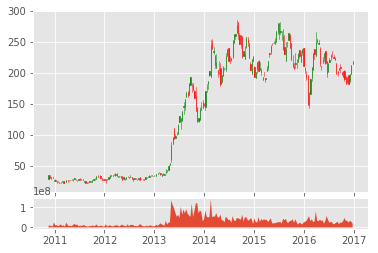

In [85]:
ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax2.xaxis_date()
candlestick_ohlc(ax1,df_ohlc.values,width=2,colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)


candlestick_ohlc requires 5 parameters ohlc with mdates, why it needs mdates and not just dates, still don't know. may be matplotlib works in some of its own mysterious ways.
the base x-axis needs to be time

In [87]:
def save_sp_500_tickers():
    resp=requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup=bs.BeautifulSoup(resp.text,'lxml')
    table=soup.find('table',{'class':'wikitable sortable'})
    tickers=[]
    for row in table.find_all('tr')[1:]:
        ticker=row.find_all('td')[0].text
        tickers.append(ticker)
    with open("sp500tickers.pickle","wb")as f:
        pickle.dump(tickers,f)
        print(tickers)
        return(tickers)

In [88]:
save_sp_500_tickers()

['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI',

['MMM',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'AYI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AET',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANDV',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'AJG',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BWA',
 'BXP',
 'BSX',
 'BHF',
 'BMY',
 'AVGO',
 'BF.B',
 'CHRW',
 'CA',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'CBOE',
 'KMX',
 'CCL',
 'CAT',
 'CBG',
 'CBS',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CHK',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 

In [21]:
def get_data_from_yahoo(reload_sp500=False):
    
    if reload_sp500:
        tickers=save_sp_500_tickers()
    else:
        with open("sp500tickers.pickle","rb")as f:
            tickers=pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    start=dt.datetime(2008,1,1)
    end=dt.datetime(2016,12,31)    
    for ticker in tickers[:100]:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df=web.DataReader(ticker,'yahoo',start,end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

In [29]:
get_data_from_yahoo()

MMM
Already have MMM
ABT
Already have ABT
ABBV
Already have ABBV
ACN
Already have ACN
ATVI
Already have ATVI
AYI
Already have AYI
ADBE
Already have ADBE
AMD
Already have AMD
AAP
Already have AAP
AES
Already have AES
AET
Already have AET
AMG
Already have AMG
AFL
Already have AFL
A
Already have A
APD
Already have APD
AKAM
Already have AKAM
ALK
Already have ALK
ALB
Already have ALB
ARE
Already have ARE
ALXN
Already have ALXN
ALGN


RemoteDataError: Unable to read URL: https://query1.finance.yahoo.com/v7/finance/download/ALGN?period1=1199125800&period2=1483208999&interval=1d&events=history&crumb=cGDmsMgasrM

In [46]:
def compile_data():
    with open("sp500tickers.pickle","rb") as f:
        tickers=pickle.load(f)
    main_df=pd.DataFrame()
    for count,ticker in enumerate(tickers[:20]):
        df=pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date',inplace=True)
        df.rename(columns={'Adj Close':ticker},inplace=True)
        df.drop(['Open','High','Low','Close','Volume'],1,inplace=True)
        
        if main_df.empty:
            main_df=df
        else:
            main_df=main_df.join(df,how='outer')
        if count%10==0:
            print(count)
    #print(main_df.head())
    main_df.to_csv('SP500_joined.csv')

In [47]:
compile_data()

0
10


In [50]:
main_df=pd.read_csv('SP500_joined.csv')

In [60]:
main_df['ABBV'].isnull().count()

2539